# Importing the required modules

In [1]:
import pandas as pd
import numpy as np
from skimage.io import imread, imshow
from skimage import transform
import matplotlib.pyplot as plt
from skimage import color
import os

# Reading the images

The images are read from the given 'folder' and the class 'type' (i.e. folder\type). Moreover, all the images are resized to 50 x 50 . The pixel matrix is extracted and saved in the dictionary.

In [2]:
chestXRays = dict()

def load_images_from_folder(folder,type):
    chestXRays[type] = []
    for filename in os.listdir(folder):
        img = imread(os.path.join(folder,filename))
        newsize = (50, 50)
        img1 = transform.resize(img,output_shape=newsize)
        if img1 is not None:
             chestXRays[type].append(img1)

# Processing the Train Images

## Feature Extraction

### Pixel Matrix

In [37]:
for i in ["normal","pneumonia"]:
  path = os.path.join(r"C:\Users\mitug\Pneumonia-Detection-System\data\Images\train",i)
  load_images_from_folder(path,i)

Few images of Pneumonia Lung X-Rays are read as rgb and hence are converted to a gray scale.

In [38]:
for i in range(len(chestXRays['pneumonia'])):
    if np.shape(chestXRays['pneumonia'][i]) != (50,50):
      chestXRays['pneumonia'][i] = color.rgb2gray(chestXRays['pneumonia'][i])

### Image Samples

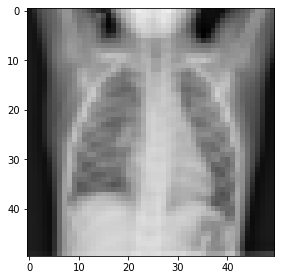

In [39]:
imshow(chestXRays['normal'][0])

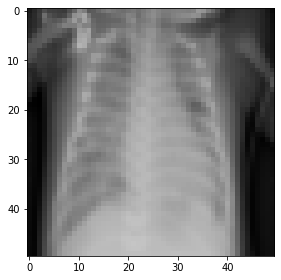

In [64]:
imshow(chestXRays['pneumonia'][0])

### Reshaping the pixel matrix

The matrix are to be reshaped as a row matrix in order to arrange as a row of a dataframe.

In [27]:
for i in range(len(chestXRays['normal'])):
    chestXRays['normal'][i] = np.reshape(chestXRays['normal'][i],(1,-1))

In [41]:
for i in range(len(chestXRays['pneumonia'])):
    chestXRays['pneumonia'][i] = np.reshape(chestXRays['pneumonia'][i],(1,-1))

Converting a two-dimensional array to a single dimension array.

In [42]:
x = np.reshape(chestXRays['normal'],(len(chestXRays['normal']),2500))

In [43]:
y = np.reshape(chestXRays['pneumonia'],(len(chestXRays['pneumonia']),2500))

## Creating a dataframe of the pixel features

### For Normal Lung X-Rays

In [44]:
n = pd.DataFrame(x)

Creating a column and adding a label "Normal" for the type of X-rays .

In [45]:
n["type"] = ["Normal"]*len(n)

In [46]:
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Columns: 2501 entries, 0 to type
dtypes: float64(2500), object(1)
memory usage: 25.6+ MB


### For Pneumonia-infected Lung X-Rays

In [47]:
p = pd.DataFrame(y)

Creating a column and adding a label "Pneumonia" for the type of X-rays .

In [48]:
p["type"] = ["Pneumonia"]*len(p)

In [49]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Columns: 2501 entries, 0 to type
dtypes: float64(2500), object(1)
memory usage: 73.9+ MB


### Combining the dataframes into a Single DataFrame

In [50]:
final = pd.concat([n,p])

## Writing the DataFrame into CSV file

In [51]:
final.to_csv(r"C:\Users\mitug\Pneumonia-Detection-System\data\csv\train.csv")

# Processing the Test Images

# Feature Extraction

### Pixel Matrix

In [3]:
for i in ["normal","pneumonia"]:
  path = os.path.join(r"C:\Users\mitug\Pneumonia-Detection-System\data\Images\test",i)
  load_images_from_folder(path,i)

## Image Sample

### Normal Lung X-Ray

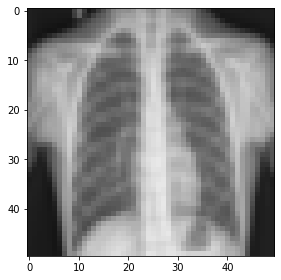

In [4]:
imshow(chestXRays["normal"][0])

### Pneumonia Lung X-Ray

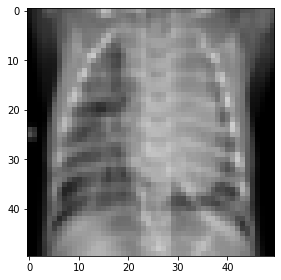

In [5]:
imshow(chestXRays["pneumonia"][0])

### Reshaping the matrix

The matrix are to be reshaped as a row matrix in order to arrange as a row of a dataframe.

In [6]:
for i in range(len(chestXRays['normal'])):
    chestXRays['normal'][i] = np.reshape(chestXRays['normal'][i],(1,-1))

In [7]:
for i in range(len(chestXRays['pneumonia'])):
    chestXRays['pneumonia'][i] = np.reshape(chestXRays['pneumonia'][i],(1,-1))

Converting a two-dimensional array to a single dimension array.

In [8]:
x = np.reshape(chestXRays['normal'],(234,2500))

In [9]:
y = np.reshape(chestXRays['pneumonia'],(len(chestXRays['pneumonia']),2500))

## Creating a dataframe from the pixel features

### For Normal Lung X-Rays

In [10]:
n = pd.DataFrame(x)

In [11]:
n["type"] = ["Normal"]*len(n)

In [12]:
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Columns: 2501 entries, 0 to type
dtypes: float64(2500), object(1)
memory usage: 4.5+ MB


### For Pneumonia-infected Lung X-Rays

In [13]:
p = pd.DataFrame(y)

In [14]:
p["type"] = ["Pneumonia"]*len(p)

In [15]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Columns: 2501 entries, 0 to type
dtypes: float64(2500), object(1)
memory usage: 7.4+ MB


### Combining the dataframes into a Single DataFrame

In [16]:
final = pd.concat([n,p])

In [17]:
final.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,type
0,0.122465,0.116420,0.109764,0.107399,0.107060,0.107025,0.106282,0.105681,0.107498,0.258542,...,0.689661,0.648444,0.584912,0.303299,0.109763,0.111618,0.123106,0.128758,0.129458,Normal
1,0.124358,0.253092,0.444090,0.548604,0.604798,0.699098,0.722988,0.720528,0.691291,0.652887,...,0.730217,0.642858,0.473676,0.162539,0.105735,0.117352,0.123976,0.127866,0.124735,Normal
2,0.141067,0.134452,0.129477,0.127610,0.129317,0.130882,0.130828,0.131132,0.130169,0.124539,...,0.740605,0.710004,0.658427,0.606793,0.330613,0.115430,0.113229,0.127140,0.133175,Normal
3,0.307677,0.343741,0.356352,0.373062,0.427929,0.446981,0.426127,0.418732,0.417412,0.417001,...,0.760763,0.750364,0.773015,0.752257,0.689769,0.634700,0.562861,0.495642,0.505871,Normal
4,0.148441,0.137073,0.124300,0.116225,0.113236,0.114013,0.117726,0.122859,0.142571,0.351559,...,0.765942,0.687622,0.594573,0.336478,0.151132,0.157526,0.162113,0.165055,0.169980,Normal


## Writing the pixel features into a CSV file

In [18]:
final.to_csv(r"C:\Users\mitug\Pneumonia-Detection-System\data\csv\test.csv")

# Processing the Validation Images

## Feature Extraction

In [20]:
for i in ["normal","pneumonia"]:
  path = os.path.join(r"C:\Users\mitug\Pneumonia-Detection-System\data\Images\val",i)
  load_images_from_folder(path,i)

## Image Samples

### Normal Lung X-Ray

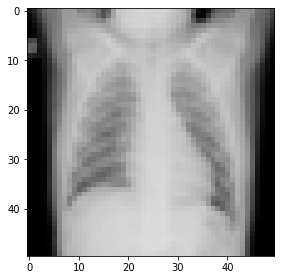

In [21]:
imshow(chestXRays["normal"][0])

### Pneumonia-infected Lung X-Ray

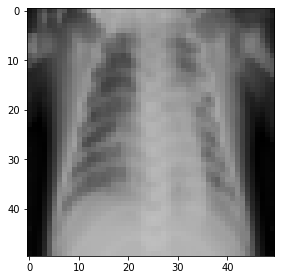

In [22]:
imshow(chestXRays["pneumonia"][0])

## Reshaping the pixel matrix

The matrix are to be reshaped as a row matrix in order to arrange as a row of a dataframe.

In [23]:
for i in range(len(chestXRays['normal'])):
    chestXRays['normal'][i] = np.reshape(chestXRays['normal'][i],(1,-1))

In [24]:
for i in range(len(chestXRays['pneumonia'])):
    chestXRays['pneumonia'][i] = np.reshape(chestXRays['pneumonia'][i],(1,-1))

Converting a two-dimensional array to a single dimension array.

In [26]:
x = np.reshape(chestXRays['normal'],(len(chestXRays['normal']),2500))

In [27]:
y = np.reshape(chestXRays['pneumonia'],(len(chestXRays['pneumonia']),2500))

## Creating a dataframe from the pixel features

### Normal Lung X-Rays

In [28]:
n = pd.DataFrame(x)

In [29]:
n["type"] = ["Normal"]*len(n)

In [30]:
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Columns: 2501 entries, 0 to type
dtypes: float64(2500), object(1)
memory usage: 156.4+ KB


### Pneumonia-infected Lung X-Rays

In [31]:
p = pd.DataFrame(y)

In [32]:
p["type"] = ["Pneumonia"]*len(p)

In [33]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Columns: 2501 entries, 0 to type
dtypes: float64(2500), object(1)
memory usage: 156.4+ KB


### Combining the dataframes into a Single DataFrame

In [34]:
final = pd.concat([n,p])

In [35]:
final.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,type
0,0.090265,0.151757,0.287090,0.405232,0.457681,0.466542,0.532181,0.600888,0.598140,0.609821,...,0.700943,0.675664,0.576725,0.274264,0.047644,0.000828,1.815899e-11,0.000000,0.000000,Normal
1,0.317278,0.150989,0.052835,0.035858,0.019328,0.005076,0.000993,0.004529,0.000441,0.003468,...,0.679417,0.478855,0.156777,0.005614,0.000002,0.000000,0.000000e+00,0.000000,0.000000,Normal
2,0.262639,0.387552,0.467830,0.514264,0.628833,0.689737,0.697894,0.641414,0.563562,0.544636,...,0.795313,0.803022,0.793797,0.756357,0.697951,0.381402,5.514905e-02,0.000626,0.000002,Normal
3,0.269848,0.211767,0.115692,0.084487,0.066895,0.054488,0.043586,0.034330,0.015354,0.007416,...,0.513655,0.567146,0.421498,0.175365,0.013744,0.003936,2.058174e-04,0.001275,0.000204,Normal
4,0.124831,0.091084,0.166966,0.219295,0.248790,0.258376,0.276915,0.405980,0.436840,0.405198,...,0.610109,0.394919,0.127044,0.059372,0.083518,0.094993,1.223609e-01,0.136758,0.121619,Normal


## Writing the pixel features into a CSV file

In [36]:
final.to_csv(r"C:\Users\mitug\Pneumonia-Detection-System\data\csv\validation.csv")